In [38]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE
import seaborn as sns

In [39]:
df = pd.read_csv('data2.csv')

In [40]:
df

,Mouth_Open_mean,Mouth_Open_std,Mouth_Open_skew,Mouth_Open_median,Mouth_Open_range,Mouth_Closed_mean,Mouth_Closed_std,Mouth_Closed_skew,Mouth_Closed_median,Mouth_Closed_range,...,Scared_skew,Scared_median,Scared_range,Disgusted_mean,Disgusted_std,Disgusted_skew,Disgusted_median,Disgusted_range,Artificiality,Expressiveness
0,-0.316932,-0.139323,0.520572,0.0,0.941697,0.316932,-0.139323,-0.520572,0.0,0.941697,...,-0.970592,2.747127,1.184609,0.057078,0.414716,-0.944344,-0.372363,-0.117168,2,1
1,-0.372296,-0.613061,-0.547291,0.0,-1.061913,0.372296,-0.613061,0.547291,0.0,-1.061913,...,-0.646273,1.371597,1.610766,-0.433304,-0.478654,-0.305011,-0.390614,-0.611292,2,1
2,-0.372296,-0.613061,-0.547291,0.0,-1.061913,0.372296,-0.613061,0.547291,0.0,-1.061913,...,-0.576356,-0.449818,-0.762836,0.141593,0.052487,-0.552835,0.188107,0.401741,2,1
3,-0.370426,-0.525913,5.275935,0.0,0.941697,0.370426,-0.525913,-5.275935,0.0,0.941697,...,0.058838,-0.522081,-0.724757,-0.432911,-0.389509,2.127730,-0.388828,0.467995,2,1
4,-0.329409,-0.196029,0.666669,0.0,0.941697,0.329409,-0.196029,-0.666669,0.0,0.941697,...,-0.186299,-0.501932,-0.780710,-0.263131,-0.336069,-0.344270,-0.218242,-0.146029,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-0.065881,0.497312,-0.098430,0.0,0.941697,0.065881,0.497312,0.098430,0.0,0.941697,...,-0.044906,-0.480628,-0.737813,-0.370943,-0.445075,-0.096357,-0.307964,-0.647984,1,2
76,-0.372296,-0.613061,-0.547291,0.0,-1.061913,0.372296,-0.613061,0.547291,0.0,-1.061913,...,-0.784188,-0.447860,-0.894541,1.152373,0.734544,-1.101117,1.321316,0.536515,1,2
77,-0.372296,-0.613061,-0.547291,0.0,-1.061913,0.372296,-0.613061,0.547291,0.0,-1.061913,...,-0.594041,1.841547,1.062892,-0.291811,-0.449079,-0.938267,-0.219532,-0.727922,1,2
78,-0.372296,-0.613061,-0.547291,0.0,-1.061913,0.372296,-0.613061,0.547291,0.0,-1.061913,...,-0.832775,1.096518,0.680805,-0.384148,-0.495723,-0.622063,-0.321983,-0.617139,1,2


In [41]:
# Extract features by dropping target columns from the dataset
X = df.drop(['Expressiveness','Artificiality'], axis=1)  
# Extract target variable 'Expressiveness' from the dataset
y = df['Expressiveness'] 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

/Users/femkeverseveld/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


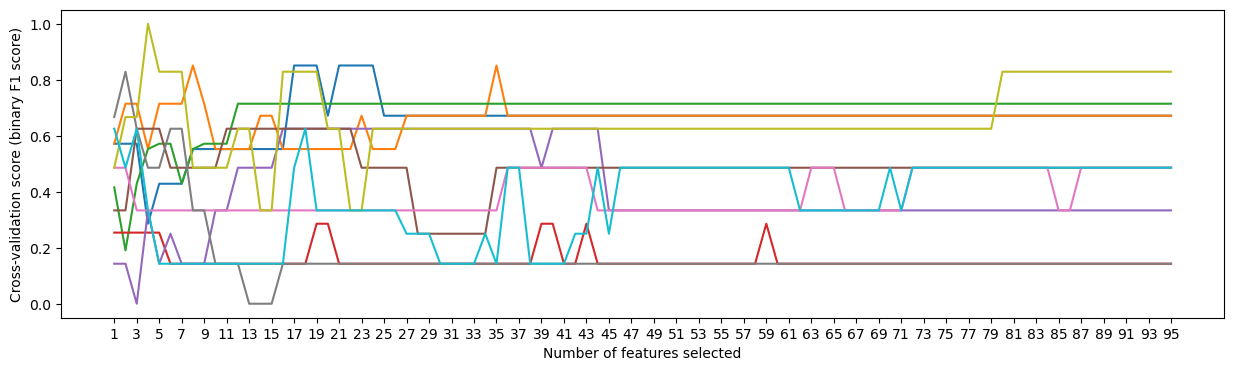

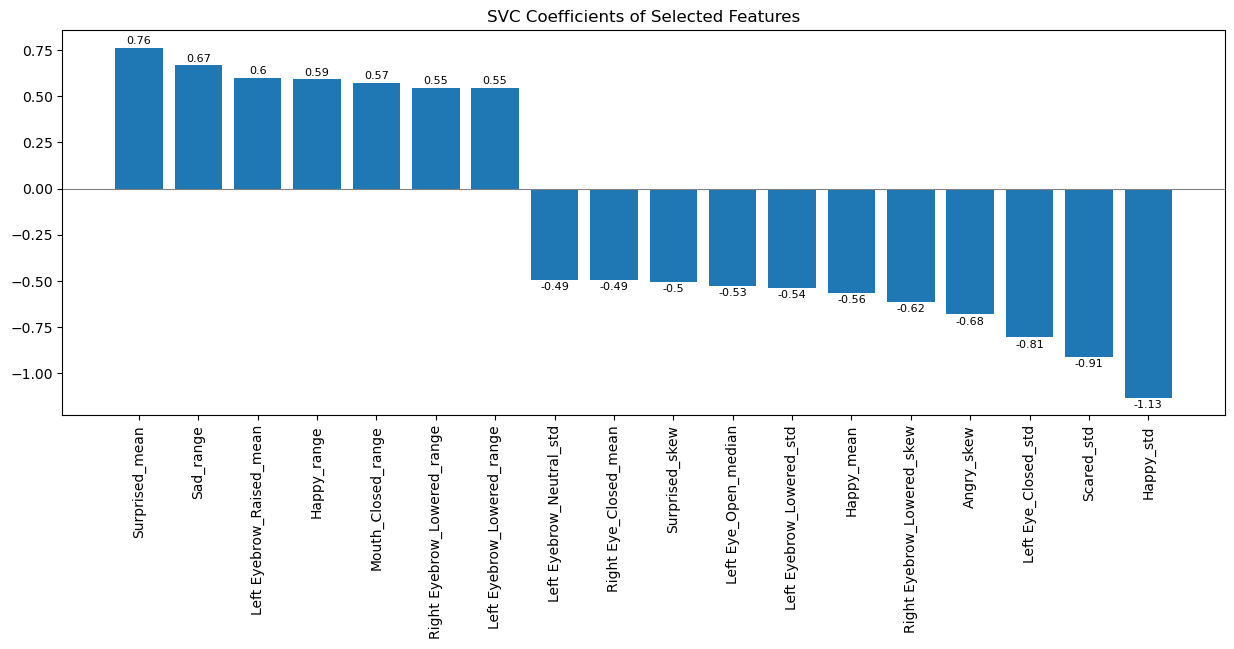

Final F1 Score on training data with 18 features: 0.870967741935484
Final F1 Score on test data with 18 features: 0.5
Classification Report for Training Data:
              precision    recall  f1-score   support

           1       0.90      0.84      0.87        32
           2       0.85      0.91      0.88        32

    accuracy                           0.88        64
   macro avg       0.88      0.88      0.87        64
weighted avg       0.88      0.88      0.87        64

Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         8
           2       0.50      0.50      0.50         8

    accuracy                           0.50        16
   macro avg       0.50      0.50      0.50        16
weighted avg       0.50      0.50      0.50        16



In [42]:
# Define cross-validation strategy
cv_strategy = StratifiedKFold(10)

# Create a pipeline_lr with StandardScaler and Logistic Regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=10000))
])

# Initialize RFECV
selector_lr = RFECV(estimator=pipeline_lr.named_steps['classifier'], step=1, cv=cv_strategy, scoring='f1_weighted', min_features_to_select=1)

# Fit RFECV
selector_lr.fit(X_train, y_train)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15, 4))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (binary F1 score)")
plt.plot(range(1, len(selector_lr.grid_scores_) + 1), selector_lr.grid_scores_)

# Ensure all x-axis numbers are displayed
plt.xticks(range(1, len(selector_lr.grid_scores_) + 1, 2))

plt.show()

# Determine the optimal features
optimal_features = [f for f, s in zip(X_train.columns, selector_lr.support_) if s]

# Fit the pipeline_lr on the optimal features
pipeline_lr.fit(X_train[optimal_features], y_train)

# Plot the Logistic Regression coefficients for the selected features
if hasattr(pipeline_lr.named_steps['classifier'], "coef_"):
    importances = pipeline_lr.named_steps['classifier'].coef_[0]
    indices = np.argsort(importances)[::-1]
    
    # Rearrange feature names so they match the sorted feature importances
    names = [optimal_features[i] for i in indices]
    
    plt.figure(figsize=(15, 5))
    plt.title("SVC Coefficients of Selected Features")
    bars = plt.bar(range(len(indices)), importances[indices])
    plt.xticks(range(len(indices)), names, rotation=90)

    # Calculate the offset as a fraction of the y-axis range
    y_offset = (plt.ylim()[1] - plt.ylim()[0]) * 0.005  # for example, 0.5% of the y-axis range

    # Draw a horizontal line at zero
    plt.axhline(0, color='grey', linewidth=0.8) 

    # Annotate the bars with the coefficient values
    for bar in bars:
        yval = bar.get_height()
        if yval >= 0:  # if bar is positive, place text above the bar
            plt.text(bar.get_x() + bar.get_width()/2, yval + y_offset, round(yval, 2), va='bottom', ha='center', fontsize=8)
        else:  # if bar is negative, place text below the bar
            plt.text(bar.get_x() + bar.get_width()/2, yval - y_offset, round(yval, 2), va='top', ha='center', fontsize=8)

plt.show()

# Make predictions using the pipeline
y_train_pred_final = pipeline_lr.predict(X_train[optimal_features])
y_test_pred_final = pipeline_lr.predict(X_test[optimal_features])

# Evaluation
f1_train_final = f1_score(y_train, y_train_pred_final, average='binary')
f1_test_final = f1_score(y_test, y_test_pred_final, average='binary')

# Output final F1 scores
print(f"Final F1 Score on training data with {len(optimal_features)} features: {f1_train_final}")
print(f"Final F1 Score on test data with {len(optimal_features)} features: {f1_test_final}")

# Output classification reports
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred_final))
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred_final))

/Users/femkeverseveld/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


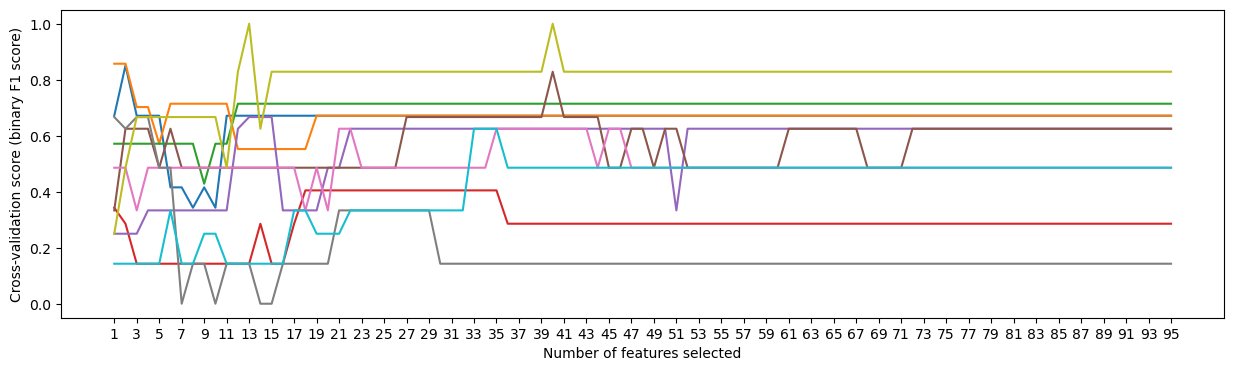

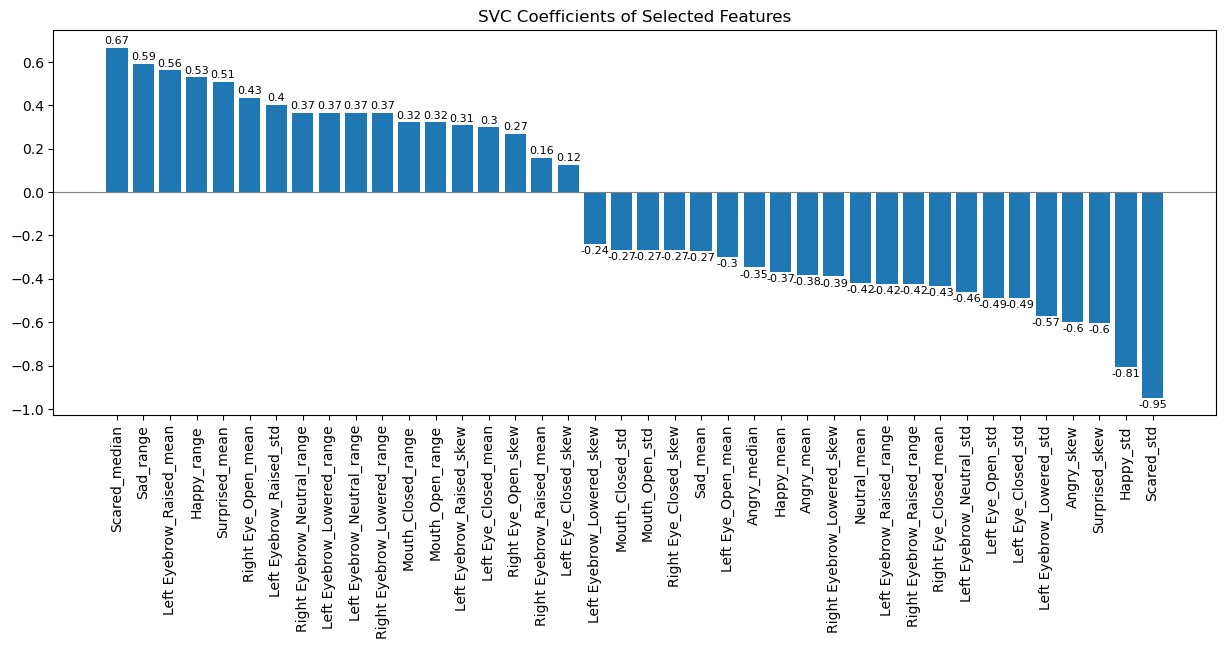

Final F1 Score on training data with 40 features: 0.9523809523809523
Final F1 Score on test data with 40 features: 0.39999999999999997
Classification Report for Training Data:
              precision    recall  f1-score   support

           1       0.97      0.94      0.95        32
           2       0.94      0.97      0.95        32

    accuracy                           0.95        64
   macro avg       0.95      0.95      0.95        64
weighted avg       0.95      0.95      0.95        64

Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.43      0.38      0.40         8
           2       0.44      0.50      0.47         8

    accuracy                           0.44        16
   macro avg       0.44      0.44      0.44        16
weighted avg       0.44      0.44      0.44        16



In [43]:
# Define cross-validation strategy
cv_strategy = StratifiedKFold(10)

# Create a pipeline_svc with StandardScaler and SVC
pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='linear', C=1, random_state=42, probability=True))
])

# Initialize RFECV
selector_svc = RFECV(estimator=pipeline_svc.named_steps['classifier'], step=1, cv=cv_strategy, scoring='f1_weighted', min_features_to_select=1)

# Fit RFECV
selector_svc.fit(X_train, y_train)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15, 4))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (binary F1 score)")
plt.plot(range(1, len(selector_svc.grid_scores_) + 1), selector_svc.grid_scores_)

# Ensure all x-axis numbers are displayed
plt.xticks(range(1, len(selector_svc.grid_scores_) + 1, 2))

plt.show()

# Determine the optimal features
optimal_features = [f for f, s in zip(X_train.columns, selector_svc.support_) if s]

# Fit the pipeline_svc on the optimal features
pipeline_svc.fit(X_train[optimal_features], y_train)

# Plot the SVC coefficients for the selected features
if hasattr(pipeline_svc.named_steps['classifier'], "coef_"):
    importances = pipeline_svc.named_steps['classifier'].coef_[0]
    indices = np.argsort(importances)[::-1]
    
    # Rearrange feature names so they match the sorted feature importances
    names = [optimal_features[i] for i in indices]
    
    plt.figure(figsize=(15, 5))
    plt.title("SVC Coefficients of Selected Features")
    bars = plt.bar(range(len(indices)), importances[indices])
    plt.xticks(range(len(indices)), names, rotation=90)

    # Calculate the offset as a fraction of the y-axis range
    y_offset = (plt.ylim()[1] - plt.ylim()[0]) * 0.005  # for example, 0.5% of the y-axis range

    # Draw a horizontal line at zero
    plt.axhline(0, color='grey', linewidth=0.8) 

    # Annotate the bars with the coefficient values
    for bar in bars:
        yval = bar.get_height()
        if yval >= 0:  # if bar is positive, place text above the bar
            plt.text(bar.get_x() + bar.get_width()/2, yval + y_offset, round(yval, 2), va='bottom', ha='center', fontsize=8)
        else:  # if bar is negative, place text below the bar
            plt.text(bar.get_x() + bar.get_width()/2, yval - y_offset, round(yval, 2), va='top', ha='center', fontsize=8)

plt.show()

# Make predictions using the pipeline_svc
y_train_pred_final = pipeline_svc.predict(X_train[optimal_features])
y_test_pred_final = pipeline_svc.predict(X_test[optimal_features])

# Evaluation
f1_train_final = f1_score(y_train, y_train_pred_final, average='binary')
f1_test_final = f1_score(y_test, y_test_pred_final, average='binary')

# Output final F1 scores
print(f"Final F1 Score on training data with {len(optimal_features)} features: {f1_train_final}")
print(f"Final F1 Score on test data with {len(optimal_features)} features: {f1_test_final}")

# Output classification reports
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred_final))
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred_final))

In [44]:
# For Logistic Regression
optimal_features_lr = [f for f, s in zip(X_train.columns, selector_lr.support_) if s]

# For Support Vector Classifier
optimal_features_svc = [f for f, s in zip(X_train.columns, selector_svc.support_) if s]

# Calculate the overlap of features
overlap_features = set(optimal_features_lr).intersection(set(optimal_features_svc))
print(f"Number of overlapping features: {len(overlap_features)}")
print(f"Overlapping features: {overlap_features}")

# For Logistic Regression
importances_lr = pipeline_lr.named_steps['classifier'].coef_[0]

# For Support Vector Classifier
importances_svc = pipeline_svc.named_steps['classifier'].coef_[0]

# Create a DataFrame for Logistic Regression features and importances
lr_features_importances = pd.DataFrame({
    'Feature': optimal_features_lr,
    'Importance': importances_lr
})

# Create a DataFrame for SVC features and importances
svc_features_importances = pd.DataFrame({
    'Feature': optimal_features_svc,
    'Importance': importances_svc
})

# Merge the two DataFrames on the features to align them
merged_importances = pd.merge(lr_features_importances, svc_features_importances, on='Feature', suffixes=('_lr', '_svc'))

# Sort by absolute importance from Logistic Regression for comparison
merged_importances['Abs_Importance_lr'] = merged_importances['Importance_lr'].abs()
merged_importances = merged_importances.sort_values(by='Abs_Importance_lr', ascending=False)

print("Feature importances aligned and compared:")
print(merged_importances[['Feature', 'Importance_lr', 'Importance_svc']])

Number of overlapping features: 17
Overlapping features: {'Left Eyebrow_Lowered_std', 'Left Eyebrow_Lowered_range', 'Happy_std', 'Right Eye_Closed_mean', 'Sad_range', 'Angry_skew', 'Right Eyebrow_Lowered_skew', 'Surprised_skew', 'Happy_mean', 'Scared_std', 'Left Eyebrow_Raised_mean', 'Left Eye_Closed_std', 'Happy_range', 'Mouth_Closed_range', 'Left Eyebrow_Neutral_std', 'Right Eyebrow_Lowered_range', 'Surprised_mean'}
Feature importances aligned and compared:
                        Feature  Importance_lr  Importance_svc
10                    Happy_std      -1.133356       -0.807012
16                   Scared_std      -0.912241       -0.947961
1           Left Eye_Closed_std      -0.806814       -0.489027
14               Surprised_mean       0.764173        0.507947
13                   Angry_skew      -0.682430       -0.599894
12                    Sad_range       0.668643        0.592239
7    Right Eyebrow_Lowered_skew      -0.615926       -0.388875
4      Left Eyebrow_Raised_mean 

In [45]:
# Extract features by dropping target columns from the dataset
X = df.drop(['Expressiveness','Artificiality'], axis=1)  
# Extract target variable 'Artificiality' from the dataset
y = df['Artificiality'] 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

/Users/femkeverseveld/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


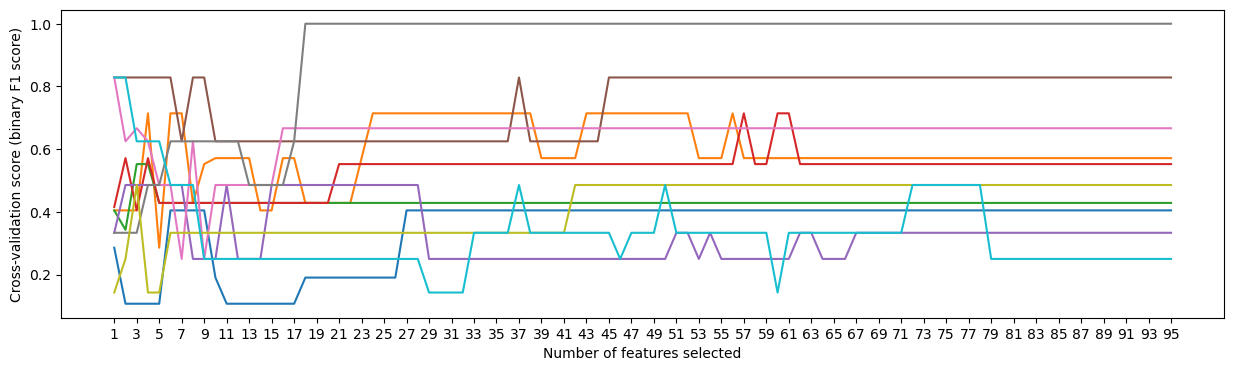

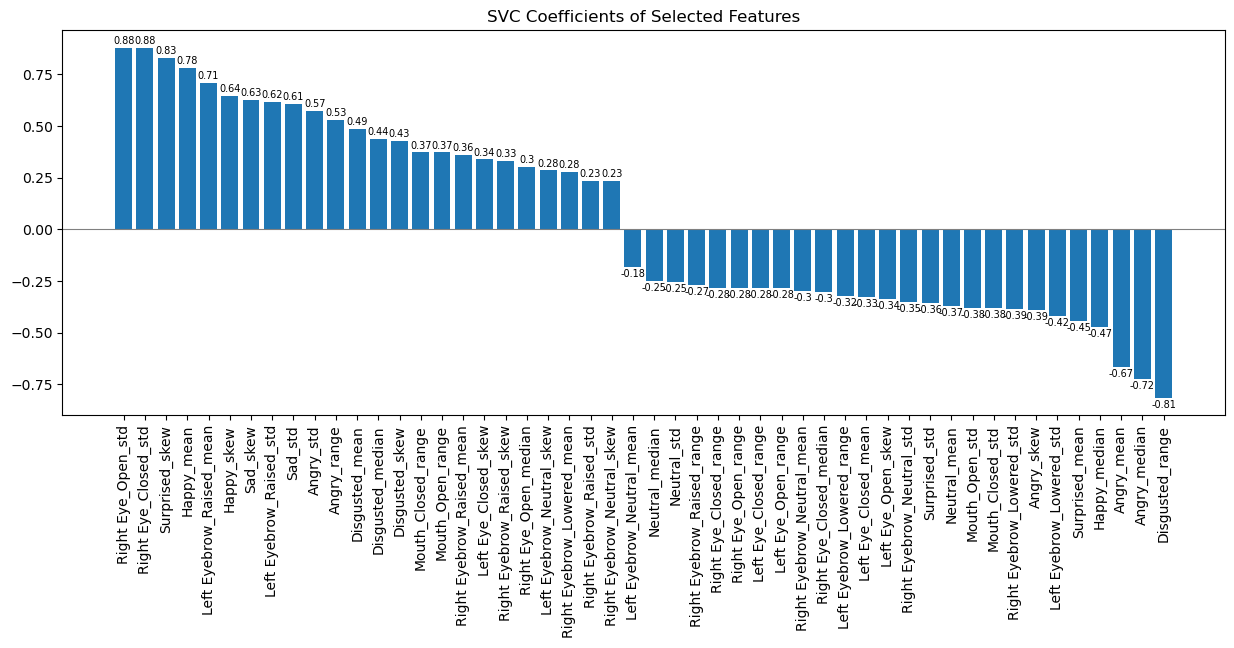

Final F1 Score on training data with 50 features: 0.9375
Final F1 Score on test data with 50 features: 0.7058823529411765
Classification Report for Training Data:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        32
           2       0.94      0.94      0.94        32

    accuracy                           0.94        64
   macro avg       0.94      0.94      0.94        64
weighted avg       0.94      0.94      0.94        64

Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.67      0.75      0.71         8
           2       0.71      0.62      0.67         8

    accuracy                           0.69        16
   macro avg       0.69      0.69      0.69        16
weighted avg       0.69      0.69      0.69        16



In [46]:
# Define cross-validation strategy
cv_strategy = StratifiedKFold(10)

# Create a pipeline_lr with StandardScaler and Logistic Regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=10000))
])

# Initialize RFECV
selector_lr = RFECV(estimator=pipeline_lr.named_steps['classifier'], step=1, cv=cv_strategy, scoring='f1_weighted', min_features_to_select=1)

# Fit RFECV
selector_lr.fit(X_train, y_train)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15, 4))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (binary F1 score)")
plt.plot(range(1, len(selector_lr.grid_scores_) + 1), selector_lr.grid_scores_)

# Ensure all x-axis numbers are displayed
plt.xticks(range(1, len(selector_lr.grid_scores_) + 1, 2))

plt.show()

# Determine the optimal features
optimal_features = [f for f, s in zip(X_train.columns, selector_lr.support_) if s]

# Fit the pipeline_lr on the optimal features
pipeline_lr.fit(X_train[optimal_features], y_train)

# Plot the Logistic Regression coefficients for the selected features
if hasattr(pipeline_lr.named_steps['classifier'], "coef_"):
    importances = pipeline_lr.named_steps['classifier'].coef_[0]
    indices = np.argsort(importances)[::-1]
    
    # Rearrange feature names so they match the sorted feature importances
    names = [optimal_features[i] for i in indices]
    
    plt.figure(figsize=(15, 5))
    plt.title("SVC Coefficients of Selected Features")
    bars = plt.bar(range(len(indices)), importances[indices])
    plt.xticks(range(len(indices)), names, rotation=90)

    # Calculate the offset as a fraction of the y-axis range
    y_offset = (plt.ylim()[1] - plt.ylim()[0]) * 0.005  # for example, 0.5% of the y-axis range

    # Draw a horizontal line at zero
    plt.axhline(0, color='grey', linewidth=0.8) 

    # Annotate the bars with the coefficient values
    for bar in bars:
        yval = bar.get_height()
        if yval >= 0:  # if bar is positive, place text above the bar
            plt.text(bar.get_x() + bar.get_width()/2, yval + y_offset, round(yval, 2), va='bottom', ha='center', fontsize=7)
        else:  # if bar is negative, place text below the bar
            plt.text(bar.get_x() + bar.get_width()/2, yval - y_offset, round(yval, 2), va='top', ha='center', fontsize=7)

plt.show()

# Make predictions using the pipeline_lr
y_train_pred_final = pipeline_lr.predict(X_train[optimal_features])
y_test_pred_final = pipeline_lr.predict(X_test[optimal_features])

# Evaluation
f1_train_final = f1_score(y_train, y_train_pred_final, average='binary')
f1_test_final = f1_score(y_test, y_test_pred_final, average='binary')

# Output final F1 scores
print(f"Final F1 Score on training data with {len(optimal_features)} features: {f1_train_final}")
print(f"Final F1 Score on test data with {len(optimal_features)} features: {f1_test_final}")

# Output classification reports
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred_final))
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred_final))

/Users/femkeverseveld/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


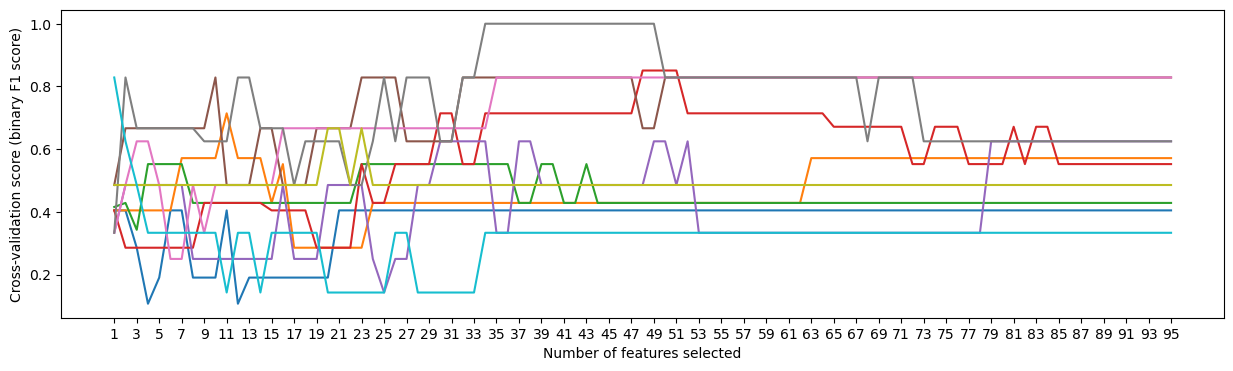

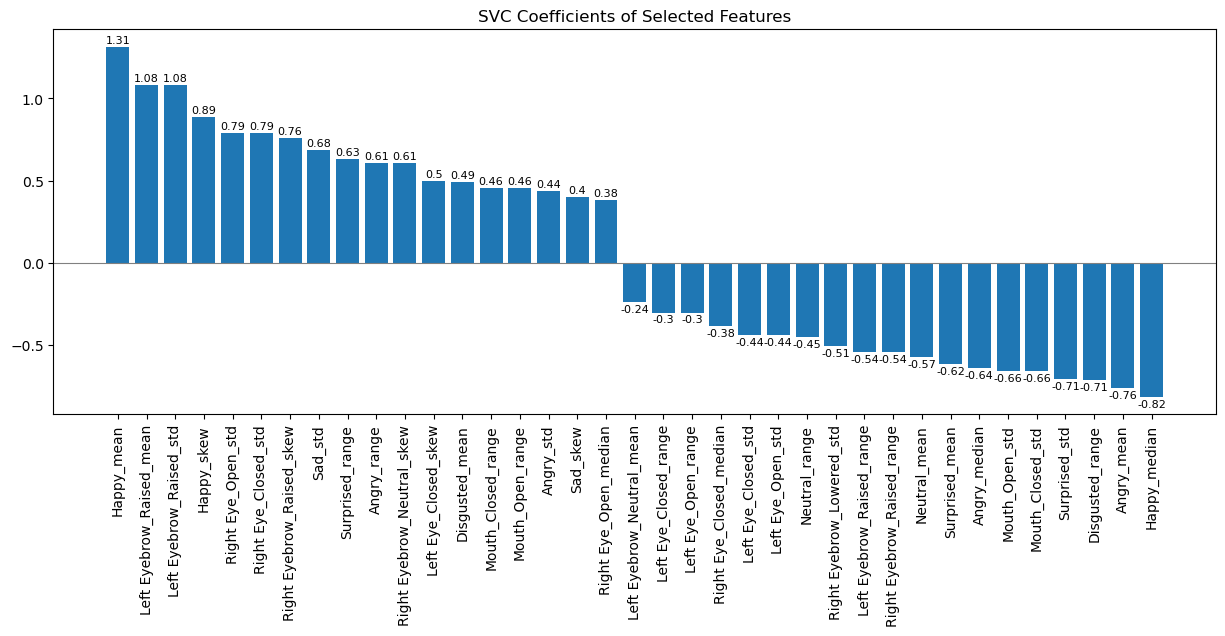

Final F1 Score on training data with 37 features: 0.9846153846153847
Final F1 Score on test data with 37 features: 0.7777777777777777
Classification Report for Training Data:
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        32
           2       1.00      0.97      0.98        32

    accuracy                           0.98        64
   macro avg       0.98      0.98      0.98        64
weighted avg       0.98      0.98      0.98        64

Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.70      0.88      0.78         8
           2       0.83      0.62      0.71         8

    accuracy                           0.75        16
   macro avg       0.77      0.75      0.75        16
weighted avg       0.77      0.75      0.75        16



In [47]:
# Define cross-validation strategy
cv_strategy = StratifiedKFold(10)

# Create a pipeline_svc with StandardScaler and SVC
pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='linear', C=1, random_state=42, probability=True))
])

# Initialize RFECV
selector_svc = RFECV(estimator=pipeline_svc.named_steps['classifier'], step=1, cv=cv_strategy, scoring='f1_weighted', min_features_to_select=1)

# Fit RFECV
selector_svc.fit(X_train, y_train)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15, 4))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (binary F1 score)")
plt.plot(range(1, len(selector_svc.grid_scores_) + 1), selector_svc.grid_scores_)

# Ensure all x-axis numbers are displayed
plt.xticks(range(1, len(selector_svc.grid_scores_) + 1, 2))

plt.show()

# Determine the optimal features
optimal_features = [f for f, s in zip(X_train.columns, selector_svc.support_) if s]

# Fit the pipeline_svc on the optimal features
pipeline_svc.fit(X_train[optimal_features], y_train)

# Plot the SVC coefficients for the selected features
if hasattr(pipeline_svc.named_steps['classifier'], "coef_"):
    importances = pipeline_svc.named_steps['classifier'].coef_[0]
    indices = np.argsort(importances)[::-1]
    
    # Rearrange feature names so they match the sorted feature importances
    names = [optimal_features[i] for i in indices]
    
    plt.figure(figsize=(15, 5))
    plt.title("SVC Coefficients of Selected Features")
    bars = plt.bar(range(len(indices)), importances[indices])
    plt.xticks(range(len(indices)), names, rotation=90)

    # Calculate the offset as a fraction of the y-axis range
    y_offset = (plt.ylim()[1] - plt.ylim()[0]) * 0.005  # for example, 0.5% of the y-axis range

    # Draw a horizontal line at zero
    plt.axhline(0, color='grey', linewidth=0.8) 

    # Annotate the bars with the coefficient values
    for bar in bars:
        yval = bar.get_height()
        if yval >= 0:  # if bar is positive, place text above the bar
            plt.text(bar.get_x() + bar.get_width()/2, yval + y_offset, round(yval, 2), va='bottom', ha='center', fontsize=8)
        else:  # if bar is negative, place text below the bar
            plt.text(bar.get_x() + bar.get_width()/2, yval - y_offset, round(yval, 2), va='top', ha='center', fontsize=8)

plt.show()

# Make predictions using the pipeline_svc
y_train_pred_final = pipeline_svc.predict(X_train[optimal_features])
y_test_pred_final = pipeline_svc.predict(X_test[optimal_features])

# Evaluation
f1_train_final = f1_score(y_train, y_train_pred_final, average='binary')
f1_test_final = f1_score(y_test, y_test_pred_final, average='binary')

# Output final F1 scores
print(f"Final F1 Score on training data with {len(optimal_features)} features: {f1_train_final}")
print(f"Final F1 Score on test data with {len(optimal_features)} features: {f1_test_final}")

# Output classification reports
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred_final))
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred_final))

In [48]:
# For Logistic Regression
optimal_features_lr = [f for f, s in zip(X_train.columns, selector_lr.support_) if s]

# For Support Vector Classifier
optimal_features_svc = [f for f, s in zip(X_train.columns, selector_svc.support_) if s]

# Calculate the overlap of features
overlap_features = set(optimal_features_lr).intersection(set(optimal_features_svc))
print(f"Number of overlapping features: {len(overlap_features)}")
print(f"Overlapping features: {overlap_features}")

# For Logistic Regression
importances_lr = pipeline_lr.named_steps['classifier'].coef_[0]

# For Support Vector Classifier
importances_svc = pipeline_svc.named_steps['classifier'].coef_[0]

# Create a DataFrame for Logistic Regression features and importances
lr_features_importances = pd.DataFrame({
    'Feature': optimal_features_lr,
    'Importance': importances_lr
})

# Create a DataFrame for SVC features and importances
svc_features_importances = pd.DataFrame({
    'Feature': optimal_features_svc,
    'Importance': importances_svc
})

# Merge the two DataFrames on the features to align them
merged_importances = pd.merge(lr_features_importances, svc_features_importances, on='Feature', suffixes=('_lr', '_svc'))

# Sort by absolute importance from Logistic Regression for comparison
merged_importances['Abs_Importance_lr'] = merged_importances['Importance_lr'].abs()
merged_importances = merged_importances.sort_values(by='Abs_Importance_lr', ascending=False)

print("Feature importances aligned and compared:")
print(merged_importances[['Feature', 'Importance_lr', 'Importance_svc']])

Number of overlapping features: 32
Overlapping features: {'Right Eyebrow_Neutral_skew', 'Angry_mean', 'Right Eyebrow_Raised_skew', 'Right Eyebrow_Lowered_std', 'Angry_std', 'Mouth_Open_std', 'Left Eyebrow_Neutral_mean', 'Right Eyebrow_Raised_range', 'Angry_range', 'Disgusted_range', 'Happy_skew', 'Right Eye_Closed_median', 'Left Eye_Closed_skew', 'Left Eyebrow_Raised_std', 'Mouth_Open_range', 'Surprised_std', 'Mouth_Closed_std', 'Mouth_Closed_range', 'Left Eye_Closed_range', 'Left Eyebrow_Raised_mean', 'Angry_median', 'Right Eye_Open_median', 'Sad_std', 'Neutral_mean', 'Left Eye_Open_range', 'Right Eye_Closed_std', 'Sad_skew', 'Happy_median', 'Right Eye_Open_std', 'Happy_mean', 'Disgusted_mean', 'Surprised_mean'}
Feature importances aligned and compared:
                       Feature  Importance_lr  Importance_svc
7           Right Eye_Open_std       0.878268        0.787090
9         Right Eye_Closed_std       0.878268        0.787090
31             Disgusted_range      -0.814433    

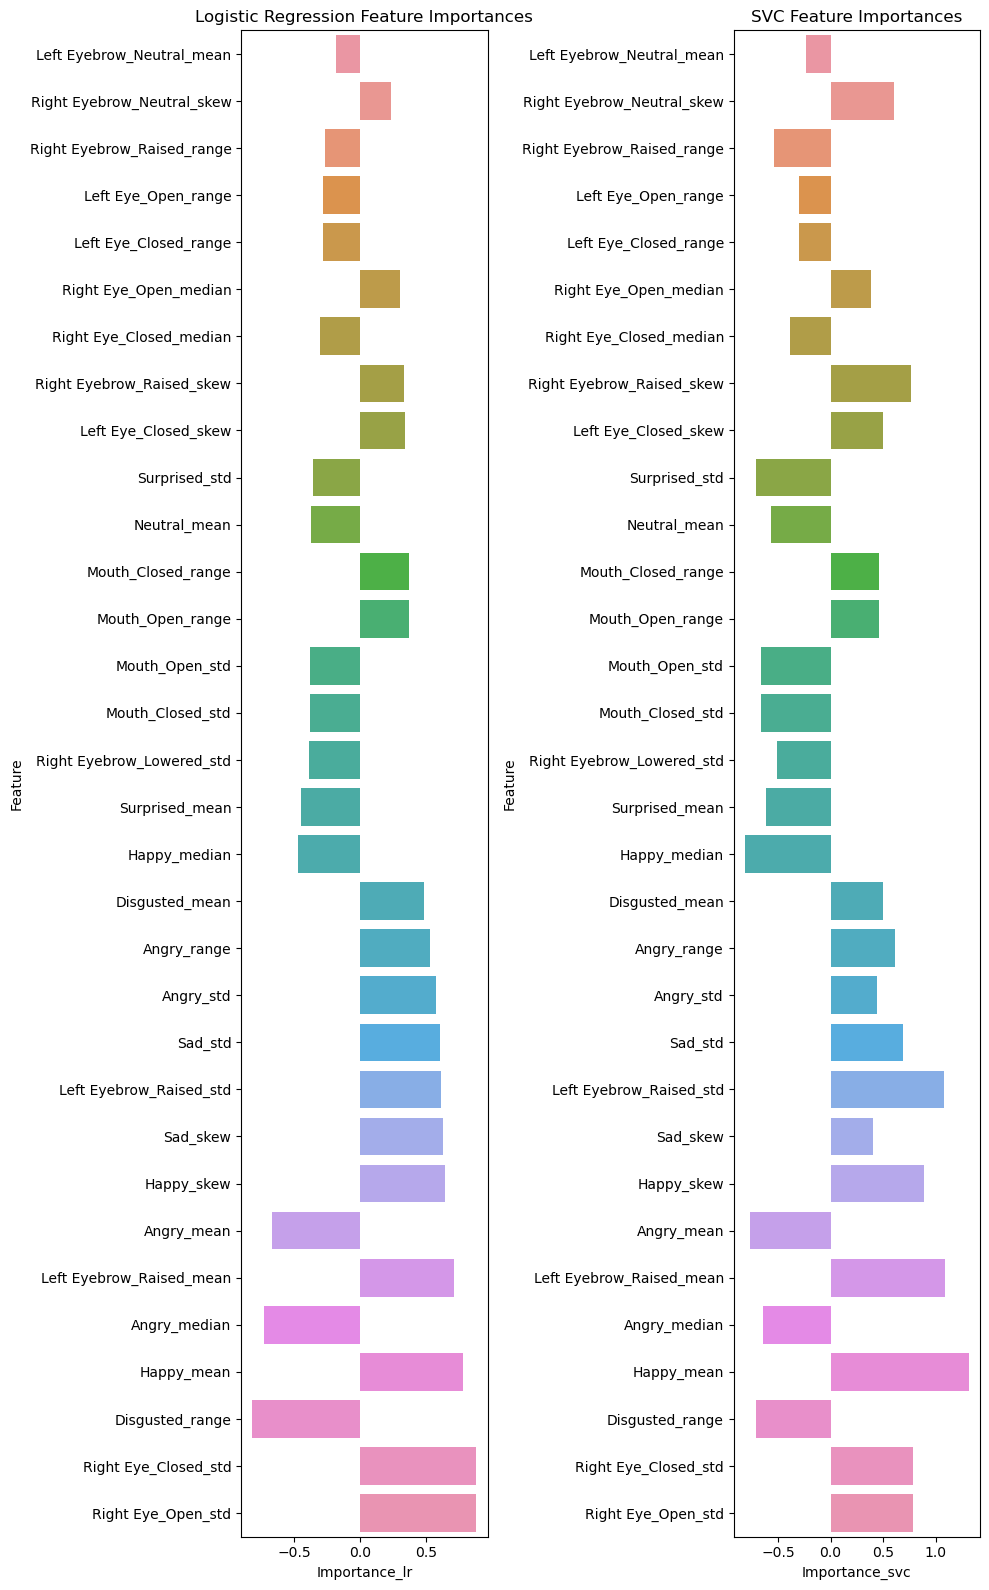

In [49]:
# Ensure the merged importances DataFrame is sorted by the absolute importance from Logistic Regression
merged_importances_sorted = merged_importances.sort_values(by='Abs_Importance_lr', ascending=True)

# Set the size of the plot
plt.figure(figsize=(10, len(merged_importances_sorted) / 2))

# Plotting the feature importances from Logistic Regression
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x='Importance_lr', y='Feature', data=merged_importances_sorted, orient='h')
plt.title('Logistic Regression Feature Importances')

# Plotting the feature importances from Support Vector Classifier
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x='Importance_svc', y='Feature', data=merged_importances_sorted, orient='h')
plt.title('SVC Feature Importances')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()